# Part f): Cross-validation as resampling techniques

/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.424e-01, tolerance: 6.137e-03
  model = cd_fast.enet_coordinate_descent(
/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.713e-01, tolerance: 5.953e-03
  model = cd_fast.enet_coordinate_descent(
/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataana

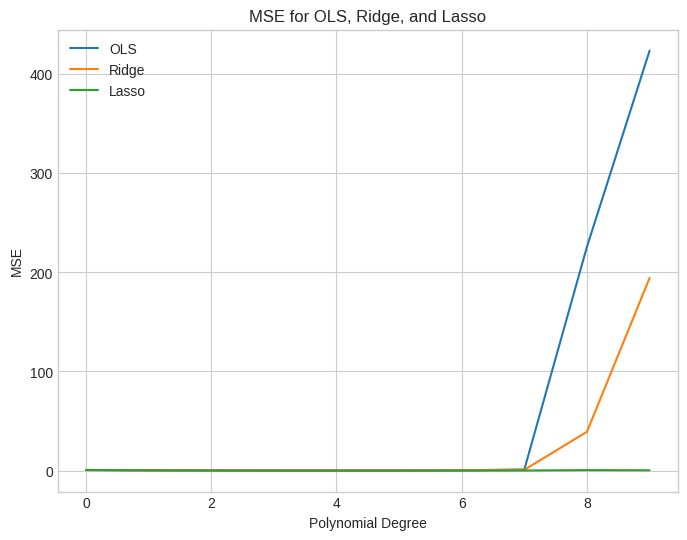

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
import load_data as ld
#plt.style.use('ggplot')

# Generate the Franke function data
#np.random.seed(42)
#N = 100
#x = np.random.rand(N)
#y = np.random.randn(N)
#z = f.FrankeFunction(x,y) #Using x,y and z when doing regression
#z = z + np.random.normal(0, 0.1, z.shape) #the noise was too high, tried sligtly less
x, y, z = ld.load_normal_data()
# Define the range of polynomial degrees to test
degrees = np.arange(0, 10)

# Define the number of folds
k_folds = 10

# Initialize arrays to store the MSE values
mse_ols = np.zeros_like(degrees, dtype=float)
mse_ridge = np.zeros_like(degrees, dtype=float)
mse_lasso = np.zeros_like(degrees, dtype=float)

# Perform k-fold cross-validation for each degree
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(np.column_stack((x, y)))
    #scaler = StandardScaler(with_std=True, with_mean=False)
    #X = scaler.fit_transform(X)
    # Perform k-fold cross-validation for ordinary least squares
    model_ols = LinearRegression(fit_intercept=False)
    mse_ols[i] = -np.mean(cross_val_score(model_ols, X, z, cv=k_folds, scoring='neg_mean_squared_error'))
    
    # Perform k-fold cross-validation for Ridge regression
    mse_temp = []
    for lambda_val in np.arange(0.00001, 1, 5):
        model_ridge = Ridge(alpha=lambda_val)
        mse = -np.mean(cross_val_score(model_ridge, X, z, cv=k_folds, scoring='neg_mean_squared_error'))
        mse_temp.append(mse)
    mse_ridge[i] = np.min(mse_temp)
    
    # Perform k-fold cross-validation for Lasso regression
    mse_temp = []
    for lambda_val in np.arange(0.00001, 1, 5):
        model_lasso = Lasso(alpha=lambda_val)
        mse = -np.mean(cross_val_score(model_lasso, X, z, cv=k_folds, scoring='neg_mean_squared_error'))
        mse_temp.append(mse)
    mse_lasso[i] = np.min(mse_temp)

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_ols, label='OLS')
plt.plot(degrees, mse_ridge, label='Ridge')
plt.plot(degrees, mse_lasso, label='Lasso')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE for OLS, Ridge, and Lasso')
plt.legend()
plt.show()
